In [ ]:
import os
from pathlib import Path

# Ensure the working directory is set to the "ma1" folder.
while Path.cwd().name != "ma2" and "ma2" in str(Path.cwd()): 
    os.chdir("..")  # Move up one directory
print(f"Working directory set to: {Path.cwd()}")


<div style="padding-left: 10px; padding-right: 10px; padding-top: 10px; padding-bottom: 30px, align: justify">
<p align="center">
<img src="../media/bow_slp1.png" alt="Transformer Architecture" width="800"/>
</p>
</div>


# An introduction to bag-of-words models

* A bag-of-words model is a type of vector representation for text data that describes the occurrence of words within a document.<br><br>
* The bag-of-words (BoW) model represents one of the most venerable methodologies in Natural Language Processing (NLP), where text is decomposed into a “bag” of its constituent words without explicit regard for syntax or word order.<br><br>
* Early conceptual groundwork for this type of representation can be traced back to seminal ideas on textual indexing and term frequency analysis (such as G. Salton's "<i>Automatic Information Organization and Retrieval</i>", 1968). Since then, bag-of-words has served as a cornerstone in a broad array of NLP tasks, including document classification, topic modeling, and information retrieval. <br><br>
* In essence, bag-of-words transforms each document into a vector of word counts or frequencies. This vectorization enables a range of statistical and machine learning methods — originally developed for structured numerical data—to operate on textual data. While more sophisticated models such as TF-IDF, word embeddings, and transformer-based architectures have become prominent, the conceptual simplicity and interpretability of BoW continue to make it a useful tool in both research and industry to this day.<br><br>

---

As shown in the image above, we represent a text document bag of words as if it were, well, a bag of words. That is, any sequence of text (or document) becomes an unordered set of words with their position ignored, keeping only their frequency in the document. In the example in the figure, instead of representing the word order in all the phrases like “<i>I love this movie</i>” and “<i>I would recommend it</i>”, we simply note that the word I occurred 5 times in the entire excerpt, the word it 6 times, the words love, recommend, and movie once, and so on. In other words, no pun intended, the position of the words is ignored (the bag-of-words assumption) and we make use of the *frequency* of each word.

## A video introduction to bag-of-words models
* To get started, please watch this video (**0:46 up to 4:26**): [Getting started with Natural Language Processing: Bag of words](https://youtu.be/UFtXy0KRxVI?t=46) 



# 1. Intuition behind bag-of-words: BoW from scratch

In this section, we will build a simple bag-of-words model from scratch. We will
1. Build intuition on how to go from a text document to a bag-of-words representation.
2. Show the preprocessing steps required to build a bag-of-words model, including lowercasing, tokenization, symbol removal and stop-word removal.
3. Implement a simple bag-of-words model in Python and use it to encode a corpus of text documents.


***

To build some intuition, let's assume we have the same text as in the image above:

In [1]:
document = "I love this movie! It's sweet, but with satirical humor. The dialogue is great and the adventure scenes are fun... It manages to be whimsical and romantic while laughing at the conventions of the fairy tale genre. I would recommend it to just about anyone. I've seen it several times, and I'm always happy to see it again whenever I have a friend who hasn't seen it yet!"
document

"I love this movie! It's sweet, but with satirical humor. The dialogue is great and the adventure scenes are fun... It manages to be whimsical and romantic while laughing at the conventions of the fairy tale genre. I would recommend it to just about anyone. I've seen it several times, and I'm always happy to see it again whenever I have a friend who hasn't seen it yet!"

If we wanted to turn that into a bag-of-words representation, we would count the frequency of each word in the text. Without any preprocessing of the text, the result would be:

In [2]:
# split the document into words
words = document.split() # split the document into words by whitespace

# create a dictionary to store the frequency of each word
word_freq = {}
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

print(word_freq)

{'I': 3, 'love': 1, 'this': 1, 'movie!': 1, "It's": 1, 'sweet,': 1, 'but': 1, 'with': 1, 'satirical': 1, 'humor.': 1, 'The': 1, 'dialogue': 1, 'is': 1, 'great': 1, 'and': 3, 'the': 3, 'adventure': 1, 'scenes': 1, 'are': 1, 'fun...': 1, 'It': 1, 'manages': 1, 'to': 3, 'be': 1, 'whimsical': 1, 'romantic': 1, 'while': 1, 'laughing': 1, 'at': 1, 'conventions': 1, 'of': 1, 'fairy': 1, 'tale': 1, 'genre.': 1, 'would': 1, 'recommend': 1, 'it': 4, 'just': 1, 'about': 1, 'anyone.': 1, "I've": 1, 'seen': 2, 'several': 1, 'times,': 1, "I'm": 1, 'always': 1, 'happy': 1, 'see': 1, 'again': 1, 'whenever': 1, 'have': 1, 'a': 1, 'friend': 1, 'who': 1, "hasn't": 1, 'yet!': 1}


We see that the word "I" appears 3 times, "love" appears 1 time, "this" appears 1 time, and so on. This is the essence of the bag-of-words model. But wait! We also have "words" like "It's" and "humor." And how about if the words "The" and "the"? They should count as the same word, right? 

How do we handle these cases? Well, we need to preprocess the text to ensure that we are counting the words correctly. This is the first step in the bag-of-words model: **text preprocessing**.

1. **Lowercasing**: Ensuring that all words are in the same case.
2. **Removing punctuation**: Removing any punctuation marks from the text.
3. **Tokenization**: Splitting the text into words or phrases.

In [3]:
def preprocess_text(text):


    # 1. Convert the text to lowercase
    text = text.lower()

    # 2. Remove punctuation by building a new string without those characters
    # Define punctuation characters explicitly (since we are not using any libraries)
    punctuation_chars = ".,!?;:'\"()"
    text = ''.join(char for char in text if char not in punctuation_chars)

    # 3. Tokenize by splitting on whitespace
    tokens = text.split()

    return tokens

# Process the document and print results
tokens = preprocess_text(document)
print(tokens)


['i', 'love', 'this', 'movie', 'its', 'sweet', 'but', 'with', 'satirical', 'humor', 'the', 'dialogue', 'is', 'great', 'and', 'the', 'adventure', 'scenes', 'are', 'fun', 'it', 'manages', 'to', 'be', 'whimsical', 'and', 'romantic', 'while', 'laughing', 'at', 'the', 'conventions', 'of', 'the', 'fairy', 'tale', 'genre', 'i', 'would', 'recommend', 'it', 'to', 'just', 'about', 'anyone', 'ive', 'seen', 'it', 'several', 'times', 'and', 'im', 'always', 'happy', 'to', 'see', 'it', 'again', 'whenever', 'i', 'have', 'a', 'friend', 'who', 'hasnt', 'seen', 'it', 'yet']


Now let's build our term frequency dictionary again with our preprocessed text/tokens:

In [4]:
# create a dictionary to store the frequency of each word
word_freq = {}
for word in tokens:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

print(word_freq)

{'i': 3, 'love': 1, 'this': 1, 'movie': 1, 'its': 1, 'sweet': 1, 'but': 1, 'with': 1, 'satirical': 1, 'humor': 1, 'the': 4, 'dialogue': 1, 'is': 1, 'great': 1, 'and': 3, 'adventure': 1, 'scenes': 1, 'are': 1, 'fun': 1, 'it': 5, 'manages': 1, 'to': 3, 'be': 1, 'whimsical': 1, 'romantic': 1, 'while': 1, 'laughing': 1, 'at': 1, 'conventions': 1, 'of': 1, 'fairy': 1, 'tale': 1, 'genre': 1, 'would': 1, 'recommend': 1, 'just': 1, 'about': 1, 'anyone': 1, 'ive': 1, 'seen': 2, 'several': 1, 'times': 1, 'im': 1, 'always': 1, 'happy': 1, 'see': 1, 'again': 1, 'whenever': 1, 'have': 1, 'a': 1, 'friend': 1, 'who': 1, 'hasnt': 1, 'yet': 1}


This looks much better! We have successfully built a term frequency dictionary for our text: A registry of the counts of each word in our document.

But what if we have multiple texts? How do we build a term frequency dictionary for all of them? A set of document texts is called a **corpus**. Let's define a simple corpus and then build a TF dictionary for it.

In [5]:
corpus = [
    "Natural Language Processing (NLP) is a fascinating field of study, which involves the interaction between computers and humans using natural language.",
    "The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful.",
    "There are many challenges in NLP, such as dealing with the ambiguity and variability of natural language.",
    "Techniques in NLP include tokenization, stemming, lemmatization, and part-of-speech tagging, among others.",
    "Applications of NLP are vast and include machine translation, sentiment analysis, and speech recognition.",
    "In recent years, deep learning has revolutionized NLP, leading to significant improvements in tasks like language modeling and text generation.",
    "Despite these advancements, there are still many open problems in NLP, such as understanding context and handling low-resource languages.",
    "Researchers in NLP are continually developing new methods and models to address these challenges and improve the performance of NLP systems."
]

In [6]:
preprocessed_documents = [preprocess_text(doc) for doc in corpus]

print(f"{len(preprocessed_documents)=} | {len(corpus)=}\n")
print(preprocessed_documents)

# Create word_freq = {}
for tokens in preprocessed_documents:
    for word in tokens:
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

print(f"{len(word_freq)=}\n")
print(word_freq) # a dictionary to store the frequency of each word in the corpus


len(preprocessed_documents)=8 | len(corpus)=8

[['natural', 'language', 'processing', 'nlp', 'is', 'a', 'fascinating', 'field', 'of', 'study', 'which', 'involves', 'the', 'interaction', 'between', 'computers', 'and', 'humans', 'using', 'natural', 'language'], ['the', 'goal', 'of', 'nlp', 'is', 'to', 'enable', 'computers', 'to', 'understand', 'interpret', 'and', 'generate', 'human', 'language', 'in', 'a', 'way', 'that', 'is', 'both', 'meaningful', 'and', 'useful'], ['there', 'are', 'many', 'challenges', 'in', 'nlp', 'such', 'as', 'dealing', 'with', 'the', 'ambiguity', 'and', 'variability', 'of', 'natural', 'language'], ['techniques', 'in', 'nlp', 'include', 'tokenization', 'stemming', 'lemmatization', 'and', 'part-of-speech', 'tagging', 'among', 'others'], ['applications', 'of', 'nlp', 'are', 'vast', 'and', 'include', 'machine', 'translation', 'sentiment', 'analysis', 'and', 'speech', 'recognition'], ['in', 'recent', 'years', 'deep', 'learning', 'has', 'revolutionized', 'nlp', 'leading'

We now see that our vocabulary has grown! We now have 140 different words - of *tokens* as we call them in NLP - in our corpus. 


##### Converting Text to Numerical Vectors

Once we have preprocessed our corpus and built a vocabulary of unique words (or “tokens”), the next logical step in most text processing workflows is to transform each document into a numerical vector. This transformation is a crucial step because many (most) statistical and machine learning algorithms require numeric input. Converting text to vectors allows us to use common methods such as clustering, classification, and regression on textual data.

We will construct a so-called “**document-term matrix**” structure, where rows represent documents and columns represent distinct words (from the vocabulary), is easy to manipulate and analyze. This enables us to apply a wide range of analytic techniques—from computing simple frequencies to more advanced weighting methods like TF-IDF - as we will see in the next sections.

In the code below:
- We create an index mapping for each word to its corresponding column in the “document-term matrix.”
- We iterate over each document to produce vectors containing the count of each word in that document.

This process lays the foundation for many text analysis tasks. Once documents are transformed into numerical vectors, you can apply standard methods like *K*-means clustering, logistic regression, or even neural networks to glean insights and build predictive models based on text data.


In [7]:
def build_document_term_matrix(preprocessed_documents):
    """
    Builds a Bag-of-Words document-term matrix.
    Returns:
    - document_term_matrix (list of lists): BoW representation of documents
    - vocab (list): Sorted vocabulary of unique words
    - word_to_index (dict): Mapping of word → index in vocabulary
    """
    # 1. Extract unique vocabulary from the dataset and sort it
    vocab = sorted(set(word for doc in preprocessed_documents for word in doc))

    # 2. Create a word-to-index mapping
    word_to_index = {word: idx for idx, word in enumerate(vocab)}

    # 3. Convert each document into a vector
    document_term_matrix = []
    
    for tokens in preprocessed_documents:
        doc_vector = [0] * len(vocab)  # Initialize a vector of zeros
        for token in tokens:
            if token in word_to_index:
                doc_vector[word_to_index[token]] += 1  # Increment word count
        document_term_matrix.append(doc_vector)

    print(f"\nVocabulary Size: {len(vocab)} | Number of Documents: {len(document_term_matrix)}\n")
    # Let's print the result in a readable way
    for i, vector in enumerate(document_term_matrix):
        print(f"Document {i} vector:\n{vector}\n")
        print(f"Document {i} text:\n{preprocessed_documents[i]}\n\n{'#'*50}\n")

    # Optionally, we can inspect the shape of our document-term matrix
    print(f"Number of documents: {len(document_term_matrix)}")
    print(f"Vocabulary size: {len(vocab)}")

    return document_term_matrix, vocab, word_to_index

document_term_matrix, vocab, word_to_index = build_document_term_matrix(preprocessed_documents)


Vocabulary Size: 94 | Number of Documents: 8

Document 0 vector:
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0]

Document 0 text:
['natural', 'language', 'processing', 'nlp', 'is', 'a', 'fascinating', 'field', 'of', 'study', 'which', 'involves', 'the', 'interaction', 'between', 'computers', 'and', 'humans', 'using', 'natural', 'language']

##################################################

Document 1 vector:
[1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0]

Document 1 text:
['the', 'goal', 'of', 'nlp', 'is', 'to', 'enable'

We could also convert this to a Pandas DataFrame for better visualization:

In [8]:
import pandas as pd

pd.DataFrame(document_term_matrix, columns=vocab).set_index(pd.Index(corpus))

,a,address,advancements,ambiguity,among,analysis,and,applications,are,as,...,understand,understanding,useful,using,variability,vast,way,which,with,years
"Natural Language Processing (NLP) is a fascinating field of study, which involves the interaction between computers and humans using natural language.",1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
"The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful.",1,0,0,0,0,0,2,0,0,0,...,1,0,1,0,0,0,1,0,0,0
"There are many challenges in NLP, such as dealing with the ambiguity and variability of natural language.",0,0,0,1,0,0,1,0,1,1,...,0,0,0,0,1,0,0,0,1,0
"Techniques in NLP include tokenization, stemming, lemmatization, and part-of-speech tagging, among others.",0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Applications of NLP are vast and include machine translation, sentiment analysis, and speech recognition.",0,0,0,0,0,1,2,1,1,0,...,0,0,0,0,0,1,0,0,0,0
"In recent years, deep learning has revolutionized NLP, leading to significant improvements in tasks like language modeling and text generation.",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
"Despite these advancements, there are still many open problems in NLP, such as understanding context and handling low-resource languages.",0,0,1,0,0,0,1,0,1,1,...,0,1,0,0,0,0,0,0,0,0
Researchers in NLP are continually developing new methods and models to address these challenges and improve the performance of NLP systems.,0,1,0,0,0,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0


So, for each document, we have a vector that represents the frequency of each word in the document. 


In other words, we have created basic numerical features from the text data. This could be our X_train for a machine learning model, for example.

Let's try to visualize the *n* most frequent words in our corpus.

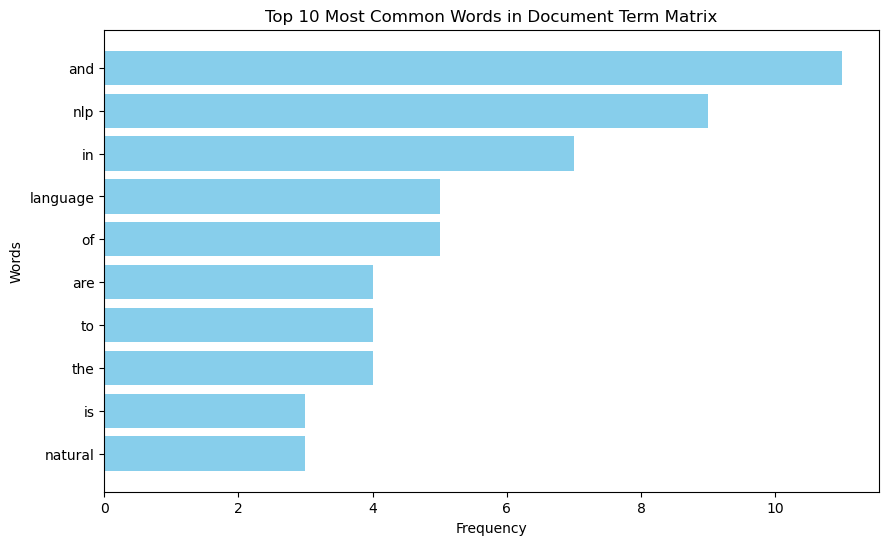

In [9]:
import numpy as np
import matplotlib.pyplot as plt


def visualize_top_n_tokens(n, document_term_matrix):

    # Sum the occurrences of each word across all documents
    word_counts = np.sum(document_term_matrix, axis=0)

    # Get the indices of the top n most common words
    top_n_indices = np.argsort(word_counts)[-n:]

    # Get the corresponding words and their counts
    top_n_words = [vocab[i] for i in top_n_indices]
    top_n_counts = word_counts[top_n_indices]

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.barh(top_n_words, top_n_counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {n} Most Common Words in Document Term Matrix')
    plt.show()

visualize_top_n_tokens(10, document_term_matrix)

What pattern do you see? 

For one, we see that a lot of the top words are common English words like "the," "and," "a," and so on. These are called **stop words** and are usually removed from the text before building a bag-of-words model. We will see how to do this in the next section.

#### Stop Words

Stop words are common words that are usually removed from the text before building a bag-of-words model. These words are usually common English words like "the," "and," "a," and so on. These words are removed because they do not provide any useful information for the model, seeing as they are common across all texts. If, for example, we were to build a model to predict the genre of a movie based on its plot, the word "movie" would not be useful because it is common across all genres. Neither would the world "the" or "and." Therefore, it is common practice to remove these words from the text before building a bag-of-words model. 

Let's revisit our preprocessing step and remove the stop words from the text.

In [10]:
# common English stop words
STOP_WORDS = ['a', 'an', 'the', 'is', 'are', 'of', 'in', 'and', 'to', 'for', 'with', 'on', 'by', 'as', 'at', 'from', 'that', 'which', 'who', 'whom', 'whose', 'where', 'when', 'why', 'how', 'what', 's', 't', 'll', 've', 're']  # noqa

In practice, we will often use a pre-built list of stop words, such as the one provided by the NLTK library or the scikit-learn library.

In [11]:
# load stopwords from scikit-learn

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS as STOP_WORDS  # noqa

print(list(STOP_WORDS))
print(f"Number of stop words: {len(STOP_WORDS)}")

['hereafter', 'give', 'over', 'she', 'sometimes', 'among', 'itself', 'am', 'inc', 'herein', 'because', 'sincere', 'those', 'beyond', 'co', 'across', 'three', 'behind', 'describe', 'amount', 'herself', 'via', 'top', 'same', 'they', 'almost', 'been', 'themselves', 'so', 'though', 'cant', 'put', 'as', 'out', 'somehow', 'last', 'should', 'be', 'around', 'eg', 'must', 'of', 'thru', 'within', 're', 'most', 'always', 'during', 'your', 'the', 'thereby', 'anyhow', 'please', 'very', 'else', 'without', 'beside', 'or', 'has', 'again', 'besides', 'nobody', 'then', 'all', 'per', 'cannot', 'nor', 'everywhere', 'under', 'until', 'four', 'ten', 'move', 'yet', 'i', 'latter', 'detail', 'beforehand', 'below', 'our', 'them', 'take', 'his', 'twenty', 'now', 'otherwise', 'himself', 'although', 'back', 'once', 'anywhere', 'hundred', 'becoming', 'only', 'mine', 'anyone', 'sixty', 'thin', 'front', 'cry', 'least', 'what', 'whose', 'nevertheless', 'either', 'when', 'its', 'fill', 'ever', 'anyway', 'being', 'never

In [12]:

# Preprocess the text
preprocessed_documents = [preprocess_text(doc) for doc in corpus]

# Remove stop words
preprocessed_documents_no_stop = [
    [token for token in document if token not in STOP_WORDS]
    for document in preprocessed_documents
]


print(f"{len(preprocessed_documents_no_stop)=} | {len(corpus)=}\n")

no_stopword_freq = {}
for tokens in preprocessed_documents_no_stop:
    for word in tokens:
        if word in no_stopword_freq:
            no_stopword_freq[word] += 1
        else:
            no_stopword_freq[word] = 1

print(f"Tokens before removing stopwords: {len(word_freq)} | Tokens after removing stopwords: {len(no_stopword_freq)}\n")
print(no_stopword_freq) # a dictionary to store the frequency of each word in the corpus


len(preprocessed_documents_no_stop)=8 | len(corpus)=8

Tokens before removing stopwords: 140 | Tokens after removing stopwords: 72

{'natural': 3, 'language': 5, 'processing': 1, 'nlp': 9, 'fascinating': 1, 'field': 1, 'study': 1, 'involves': 1, 'interaction': 1, 'computers': 2, 'humans': 1, 'using': 1, 'goal': 1, 'enable': 1, 'understand': 1, 'interpret': 1, 'generate': 1, 'human': 1, 'way': 1, 'meaningful': 1, 'useful': 1, 'challenges': 2, 'dealing': 1, 'ambiguity': 1, 'variability': 1, 'techniques': 1, 'include': 2, 'tokenization': 1, 'stemming': 1, 'lemmatization': 1, 'part-of-speech': 1, 'tagging': 1, 'applications': 1, 'vast': 1, 'machine': 1, 'translation': 1, 'sentiment': 1, 'analysis': 1, 'speech': 1, 'recognition': 1, 'recent': 1, 'years': 1, 'deep': 1, 'learning': 1, 'revolutionized': 1, 'leading': 1, 'significant': 1, 'improvements': 1, 'tasks': 1, 'like': 1, 'modeling': 1, 'text': 1, 'generation': 1, 'despite': 1, 'advancements': 1, 'open': 1, 'problems': 1, 'understanding

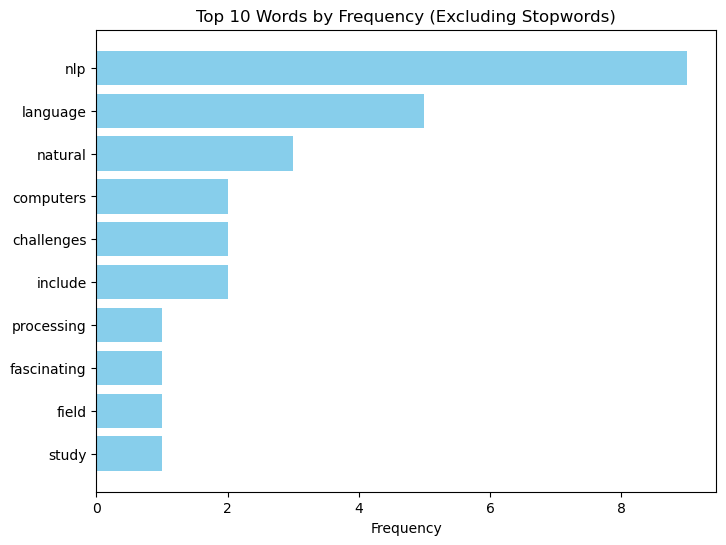

In [13]:
def plot_top_n_words(freq_dict, n=10):
    """
    Plots a horizontal bar chart of the top n most frequent words
    from a given frequency dictionary.
    """
    
    # 1. Sort the dictionary by frequency in descending order.
    sorted_freq = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)
    
    # 2. Slice the top n words and their frequencies.
    top_n = sorted_freq[:n]
    
    # 3. Separate the words and their frequencies for plotting.
    words = [item[0] for item in top_n]
    counts = [item[1] for item in top_n]
    
    # 4. Create a bar chart.
    plt.figure(figsize=(8, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top {n} Words by Frequency (Excluding Stopwords)')
    
    # Invert y-axis so the highest frequency word appears at the top
    plt.gca().invert_yaxis()
    
    # 5. Display the plot.
    plt.show()


plot_top_n_words(no_stopword_freq, n=10)


As you can see, we removed a lot of the common English words, but perhaps not all. This is because the list of stop words is not exhaustive. You can find many different list of stop words for different languages. You might also consider that we are removing words that could be useful for our model. For example, the word "not" could be useful for sentiment analysis. Therefore, it is important to consider the context of your model when removing stop words. 

#### Stemming and Lemmatization

Another common preprocessing step is **stemming** and **lemmatization**. These are techniques used to reduce words to their root form. For example, the words "running," "runs," and "ran" all have the same root word "run." Stemming and lemmatization are used to reduce words to their root form so that the model can understand that these words are the same. 

* **Stemming**: Stemming is the process of reducing words to their root form by removing suffixes. For example, the words "running," "runs," and "ran" would all be reduced to "run." There are many different stemming algorithms, but one of the most common is the Porter Stemmer.

* **Lemmatization**: Lemmatization is the process of reducing words to their root form by removing suffixes and prefixes. Lemmatization is more sophisticated than stemming because it uses a vocabulary and morphological analysis to reduce words to their root form. For example, the words "am," "are," and "is" would all be reduced to "be."

To do so, let's update our `preprocess_text` function to include stemming.

In [14]:
import nltk
from nltk.stem import PorterStemmer

# Download necessary NLTK resources (if not already installed)
nltk.download('punkt')

def preprocess_text(text):
    """
    Preprocesses text by:
    1. Converting to lowercase
    2. Removing punctuation
    3. Tokenizing (splitting into words)
    4. Applying stemming to reduce words to their root forms
    """
    
    # Initialize Porter Stemmer
    stemmer = PorterStemmer()  # <--- THIS IS NEW: Initialize the stemmer

    # 1. Convert the text to lowercase
    text = text.lower()

    # 2. Remove punctuation by keeping only alphanumeric characters and spaces
    punctuation_chars = ".,!?;:'\"()"
    text = ''.join(char for char in text if char not in punctuation_chars)

    # 3. Tokenize by splitting on whitespace
    tokens = text.split()

    # 4. Apply stemming to each token
    stemmed_tokens = [stemmer.stem(token) for token in tokens]  # <--- THIS IS NEW: Apply stemming

    # 5. remove stopwords
    stemmed_tokens = [word for word in stemmed_tokens if word not in STOP_WORDS]

    return stemmed_tokens

# Example usage
document = "Running, run, and runs are different forms of the same root word!"
tokens = preprocess_text(document)
print(f"Input: {document}")
print(f"Output: {tokens}")


Input: Running, run, and runs are different forms of the same root word!
Output: ['run', 'run', 'run', 'differ', 'form', 'root', 'word']


[nltk_data] Downloading package punkt to /Users/nicolai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Consolidating all tokens with the same root word can help reduce the size of the vocabulary and improve the model's performance!

Let's built our document-term matrix again, but this time with stemming.

In [15]:
tokenized_docs = [preprocess_text(doc) for doc in corpus]
print(tokenized_docs[0])  # Display the first two tokenized documents

['natur', 'languag', 'process', 'nlp', 'fascin', 'field', 'studi', 'involv', 'interact', 'comput', 'human', 'use', 'natur', 'languag']


In [16]:
def build_document_term_matrix(preprocessed_documents):
    """
    Builds a Bag-of-Words document-term matrix.
    Returns:
    - document_term_matrix (list of lists): BoW representation of documents
    - vocab (list): Sorted vocabulary of unique words
    - word_to_index (dict): Mapping of word → index in vocabulary
    """
    # 1. Extract unique vocabulary from the dataset and sort it
    vocab = sorted(set(word for doc in preprocessed_documents for word in doc))

    # 2. Create a word-to-index mapping
    word_to_index = {word: idx for idx, word in enumerate(vocab)}

    # 3. Convert each document into a vector
    document_term_matrix = []
    
    for tokens in preprocessed_documents:
        doc_vector = [0] * len(vocab)  # Initialize a vector of zeros
        for token in tokens:
            if token in word_to_index:
                doc_vector[word_to_index[token]] += 1  # Increment word count
        document_term_matrix.append(doc_vector)

    print(f"\nVocabulary Size: {len(vocab)} | Number of Documents: {len(document_term_matrix)}\n")
    return document_term_matrix, vocab, word_to_index

document_term_matrix, vocab, word_to_index = build_document_term_matrix(tokenized_docs)


Vocabulary Size: 66 | Number of Documents: 8



In [17]:
pd.DataFrame(document_term_matrix, columns=vocab).set_index(pd.Index(corpus))

,address,advanc,ambigu,analysi,applic,challeng,comput,context,continu,deal,...,techniqu,text,token,translat,understand,use,variabl,vast,way,year
"Natural Language Processing (NLP) is a fascinating field of study, which involves the interaction between computers and humans using natural language.",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
"The goal of NLP is to enable computers to understand, interpret, and generate human language in a way that is both meaningful and useful.",0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
"There are many challenges in NLP, such as dealing with the ambiguity and variability of natural language.",0,0,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
"Techniques in NLP include tokenization, stemming, lemmatization, and part-of-speech tagging, among others.",0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
"Applications of NLP are vast and include machine translation, sentiment analysis, and speech recognition.",0,0,0,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
"In recent years, deep learning has revolutionized NLP, leading to significant improvements in tasks like language modeling and text generation.",0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
"Despite these advancements, there are still many open problems in NLP, such as understanding context and handling low-resource languages.",0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
Researchers in NLP are continually developing new methods and models to address these challenges and improve the performance of NLP systems.,1,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


So, we now have a pretty decent bag-of-words model! We have preprocessed the text, removed stop words, and stemmed the words. We have also built a document-term matrix that represents the frequency of each word in each document. But how do we use it as an encoder? This will require us to

1. **Fit**: Build the vocabulary and the document-term matrix from the training data.
2. **Transform**: Use the fitted vocabulary to transform the test data into a document-term matrix.

In [18]:
def transform_new_document(new_documents, vocab, word_to_index):
    """
    Transforms new, unseen documents into the existing BoW format.
    Ensures the new documents match the training vocabulary structure.
    """
    new_doc_matrix = []

    for tokens in new_documents:
        doc_vector = [0] * len(vocab)  # Initialize vector with zeros
        for token in tokens:
            if token in word_to_index:
                doc_vector[word_to_index[token]] += 1  # Increment word count
        new_doc_matrix.append(doc_vector)

    return new_doc_matrix


document_term_matrix, vocab, word_to_index = build_document_term_matrix(tokenized_docs)

# New Data (Unseen)
new_docs = [
    ["nlp", "is", "fun"],
    ["i", "love", "space"],
    ["sports", "are", "amazing"]
]

# Transform the new documents using the existing vocabulary
new_doc_vectors = transform_new_document(new_docs, vocab, word_to_index)

print("\nEncoded New Documents:")
for i, vector in enumerate(new_doc_vectors):
    print(f"New Document {i} vector:\n{vector}\n")



Vocabulary Size: 66 | Number of Documents: 8


Encoded New Documents:
New Document 0 vector:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

New Document 1 vector:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

New Document 2 vector:
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



## 2. Automating Bag-of-Words Processing with CountVectorizer

So far, we have manually implemented the **Bag-of-Words (BoW) model** by performing the following preprocessing steps:

1. **Lowercasing** – To ensure that words like "The" and "the" are treated as the same token.  
2. **Removing Punctuation** – To prevent punctuation marks from interfering with tokenization.  
3. **Removing Stopwords** – To eliminate common words that do not carry much information.
4. **Tokenization** – To split text into individual words (tokens).  
5. **Stemming** – To reduce words to their root forms (e.g., "running" → "run").  

While implementing these steps manually is useful for understanding text preprocessing, in real-world applications, we often use libraries like **Scikit-learn’s `CountVectorizer`**, which automates much of this process. `CountVectorizer`:

- Converts text into a numerical matrix where each column represents a unique word.
- Tokenizes and processes text efficiently.
- Allows filtering of stopwords and setting custom preprocessing options.

### **But what about Stemming?**
One limitation of `CountVectorizer` is that **it does not include stemming by default**. However, we can integrate stemming by **creating a custom tokenizer** that applies stemming before passing tokens to `CountVectorizer`.

### **Solution: Custom Preprocessing for CountVectorizer**
Instead of using the default tokenization in `CountVectorizer`, we will:
1. Write a **custom tokenizer** that applies stemming.
2. Pass this tokenizer into `CountVectorizer` via the `tokenizer` argument.

This approach allows us to combine the **power of `CountVectorizer`** with the **benefits of stemming**, ensuring that words like *running*, *runs*, and *runner* are all treated as the same token.

## Newsgroups Dataset
Before we go on, let's switch to a more exciting dataset. We will use the **20 newsgroups** dataset, which is a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. This dataset is often used for text classification and clustering tasks. For this tutorial, we will use a subset of the dataset containing only 2 categories: `sci.space` and `rec.sport.baseball`.

We will apply the concepts we have learned so far to this dataset. Let's start by loading the dataset and exploring it.

In [19]:
# load the 20 newsgroups dataset

from sklearn.datasets import fetch_20newsgroups

# Define the categories
categories = ['rec.sport.baseball', 'sci.space']

# Load the training data
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, remove=('headers', 'footers', 'quotes'))

# Load the testing data
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories, remove=('headers', 'footers', 'quotes'))

# Display some information about the data
print('Training data size:', len(newsgroups_train.data))
print('Testing data size:', len(newsgroups_test.data))
print('Example document:')
print(newsgroups_train.data[0])

Training data size: 1190
Testing data size: 791
Example document:
I've been saying this for quite some time, but being absent from the
net for a while I figured I'd stick my neck out a bit...

The Royals will set the record for fewest runs scored by an AL
team since the inception of the DH rule.  (p.s. any ideas what this is?)

They will fall easily short of 600 runs, that's for damn sure.  I can't
believe these media fools picking them to win the division (like our
Tom Gage of the Detroit News claiming Herk Robinson is some kind of
genius for the trades/aquisitions he's made)

c-ya

Sean




Let's turn these documents into a bag-of-words model. We will follow the same steps as before, but this time we will use the `CountVectorizer` from scikit-learn, which does (nearly) all the preprocessing steps for us!

In [23]:
from sklearn.feature_extraction.text import CountVectorizer


# 2️⃣ Convert text into Bag-of-Words representation
vectorizer = CountVectorizer(
    tokenizer=preprocess_text,  # <--- Use our custom preprocess_text function as the tokenizer
)


X_train = vectorizer.fit_transform(newsgroups_train.data)  # Learn the vocabulary and transform the data into feature vectors
X_test = vectorizer.transform(newsgroups_test.data) # Transform the test data into feature vectors (Never fit your test data!)

# Target labels (1=space 0=baseball)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Create a DataFrame from the vectorizer vocabulary
vocab = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out(), index=newsgroups_train.data)
vocab.head()

/opt/anaconda3/envs/aiml25-ma2/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,#,#/usr/bin/perl,#0739,#1,#102,#14,#150,#1506,#2,#2219,...,~31,~400,~5,~50,~85,~ftp/pub/rsdwg,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,º,ñ-
"I've been saying this for quite some time, but being absent from the\nnet for a while I figured I'd stick my neck out a bit...\n\nThe Royals will set the record for fewest runs scored by an AL\nteam since the inception of the DH rule. (p.s. any ideas what this is?)\n\nThey will fall easily short of 600 runs, that's for damn sure. I can't\nbelieve these media fools picking them to win the division (like our\nTom Gage of the Detroit News claiming Herk Robinson is some kind of\ngenius for the trades/aquisitions he's made)\n\nc-ya\n\nSean\n\n",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Sorry for asking a question that's not entirely based on the\ntechnical aspects of space, but I couldn't find the\nanswer on the FAQs !\n\nI'm currently in the UK, which makes seeing a Space Shuttle\nlaunch a little difficult.....\n\nHowever, I have been selected to be an exchange student\nat Louisiana State Uni. from August, and I am absolutely\ndetermined to get to see a Space Shuttle launch sometime\nduring the year at which I will be in America.\n\nI hear there's a bit of a long mailing list, so if someone\ncan tell me how to get tickets and where to get them from, then\nplease E-mail me !\n\nThanks very much for your patience....\n\n(And if anyone else wants to know, tell me and I'll summarize\nfor you - just to save all those poor people who have to\npay for their links !)",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Giant's have a five man rotation of John Burkett, Trevor Wilson,\nBill Swift, Jeff Brantley, and Bud Black/Dave Burba. Black has\nbeen put on the 15 day disables and Dave Burba will take his starts.\n\n",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"\n\nLot's of these small miners are no longer miners. THey are people living\nrent free on Federal land, under the claim of being a miner. The facts are\nmany of these people do not sustaint heir income from mining, do not\noften even live their full time, and do fotentimes do a fair bit\nof environmental damage.\n\nThese minign statutes were created inthe 1830's-1870's when the west was\nuninhabited and were designed to bring people into the frontier. Times change\npeople change. DEAL. you don't have a constitutional right to live off\nthe same industry forever. Anyone who claims the have a right to their\njob in particular, is spouting nonsense. THis has been a long term\nfederal welfare program, that has outlived it's usefulness.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"The term ""stopper"" is generally used to refer to a pitcher, one\nwho can be counted on to pitch a strong game to keep his team from going\non a losing streak.\n\n\tThe Braves have plenty of pitchers to fit this description,\nalthough right now I'd expect Smoltz or Glavine to take the mantle.\n\n\tWhat the Braves lack, however, is an offensive stopper,\nsomebody they can look to to bring them out of their hitting slump.\nThere's just no one there. The Braves got rid of their best pure\nhitter, Lonnie Smith, and only Terry Pendleton on the current roster\nhas ever shown more than a cursory ability to hit.\t\n\n\tOh, and another thing that worries me. Ron Gant seems to have\nslowed down a step. That's scary. A slow Ron Gant doesn't have much going\nfor him.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Notice from the dataframe above that we have 

* Over 16.4K tokens in our vocabulary!
* a lot of pretty strange words in our vocabulary. Tokens like "~ftp/pub/rsdwg" could be really useful or really noisy - depending on the context.

If we wanted to remove these tokens, we could use the `min_df` and `max_df` parameters in `CountVectorizer`. These parameters allow us to set the minimum and maximum frequency of a token in the corpus. For example, if we set `min_df=0.01`, we would remove tokens that appear in less than 1% of the documents. If we set `max_df=0.9`, we would remove tokens that appear in more than 90% of the documents. Since a lot of word often only appear once, this could be a good way to remove some noise from the data.

In [36]:
# 2️⃣ Convert text into Bag-of-Words representation
vectorizer = CountVectorizer(
    tokenizer=preprocess_text,  # <--- Use our custom preprocess_text function as the tokenizer
    min_df=0.012,  # Ignore terms that have a document frequency strictly lower than the given threshold
    max_df=0.9,  # Ignore terms that have a document frequency strictly higher than the given threshold
)


X_train = vectorizer.fit_transform(newsgroups_train.data)  # Learn the vocabulary and transform the data into feature vectors
X_test = vectorizer.transform(newsgroups_test.data) # Transform the test data into feature vectors (Never fit your test data!)

# Target labels (1=space 0=baseball)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Create a DataFrame from the vectorizer vocabulary
vocab = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out(), index=newsgroups_train.data)
vocab.head()

/opt/anaconda3/envs/aiml25-ma2/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,$,$date,&,*,-,--,/,0,1,10,...,wrong,yanke,ye,yeah,year,yesterday,york,youd,young,|
"I've been saying this for quite some time, but being absent from the\nnet for a while I figured I'd stick my neck out a bit...\n\nThe Royals will set the record for fewest runs scored by an AL\nteam since the inception of the DH rule. (p.s. any ideas what this is?)\n\nThey will fall easily short of 600 runs, that's for damn sure. I can't\nbelieve these media fools picking them to win the division (like our\nTom Gage of the Detroit News claiming Herk Robinson is some kind of\ngenius for the trades/aquisitions he's made)\n\nc-ya\n\nSean\n\n",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"Sorry for asking a question that's not entirely based on the\ntechnical aspects of space, but I couldn't find the\nanswer on the FAQs !\n\nI'm currently in the UK, which makes seeing a Space Shuttle\nlaunch a little difficult.....\n\nHowever, I have been selected to be an exchange student\nat Louisiana State Uni. from August, and I am absolutely\ndetermined to get to see a Space Shuttle launch sometime\nduring the year at which I will be in America.\n\nI hear there's a bit of a long mailing list, so if someone\ncan tell me how to get tickets and where to get them from, then\nplease E-mail me !\n\nThanks very much for your patience....\n\n(And if anyone else wants to know, tell me and I'll summarize\nfor you - just to save all those poor people who have to\npay for their links !)",0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
"Giant's have a five man rotation of John Burkett, Trevor Wilson,\nBill Swift, Jeff Brantley, and Bud Black/Dave Burba. Black has\nbeen put on the 15 day disables and Dave Burba will take his starts.\n\n",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"\n\nLot's of these small miners are no longer miners. THey are people living\nrent free on Federal land, under the claim of being a miner. The facts are\nmany of these people do not sustaint heir income from mining, do not\noften even live their full time, and do fotentimes do a fair bit\nof environmental damage.\n\nThese minign statutes were created inthe 1830's-1870's when the west was\nuninhabited and were designed to bring people into the frontier. Times change\npeople change. DEAL. you don't have a constitutional right to live off\nthe same industry forever. Anyone who claims the have a right to their\njob in particular, is spouting nonsense. THis has been a long term\nfederal welfare program, that has outlived it's usefulness.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"The term ""stopper"" is generally used to refer to a pitcher, one\nwho can be counted on to pitch a strong game to keep his team from going\non a losing streak.\n\n\tThe Braves have plenty of pitchers to fit this description,\nalthough right now I'd expect Smoltz or Glavine to take the mantle.\n\n\tWhat the Braves lack, however, is an offensive stopper,\nsomebody they can look to to bring them out of their hitting slump.\nThere's just no one there. The Braves got rid of their best pure\nhitter, Lonnie Smith, and only Terry Pendleton on the current roster\nhas ever shown more than a cursory ability to hit.\t\n\n\tOh, and another thing that worries me. Ron Gant seems to have\nslowed down a step. That's scary. A slow Ron Gant doesn't have much going\nfor him.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


By setting a `min_df` of 0.012 and `max_df` to 0.9 (which means we remove tokens that appear in less than 1.2% of the documents or more than 90% of the documents), we can reduce the number of tokens in our vocabulary from ~16.4K to just over 1K!

In [40]:
from sklearn.naive_bayes import MultinomialNB


# 3️⃣ Train a Naive Bayes classifier (good for BoW text data)
model = MultinomialNB()
model.fit(X_train, y_train)

# 4️⃣ Predict on the test set
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

# 5️⃣ Evaluate Model Performance

# Compute accuracy by comparing predicted labels (y_pred) with actual labels (y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Generate a detailed classification report (precision, recall, f1-score)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=categories))


Model Accuracy: 0.9178

Classification Report:

                    precision    recall  f1-score   support

rec.sport.baseball       0.90      0.94      0.92       397
         sci.space       0.94      0.90      0.92       394

          accuracy                           0.92       791
         macro avg       0.92      0.92      0.92       791
      weighted avg       0.92      0.92      0.92       791



Those are pretty good scores! We have successfully built a bag-of-words model for our text data and used it to classify the documents into their respective categories.

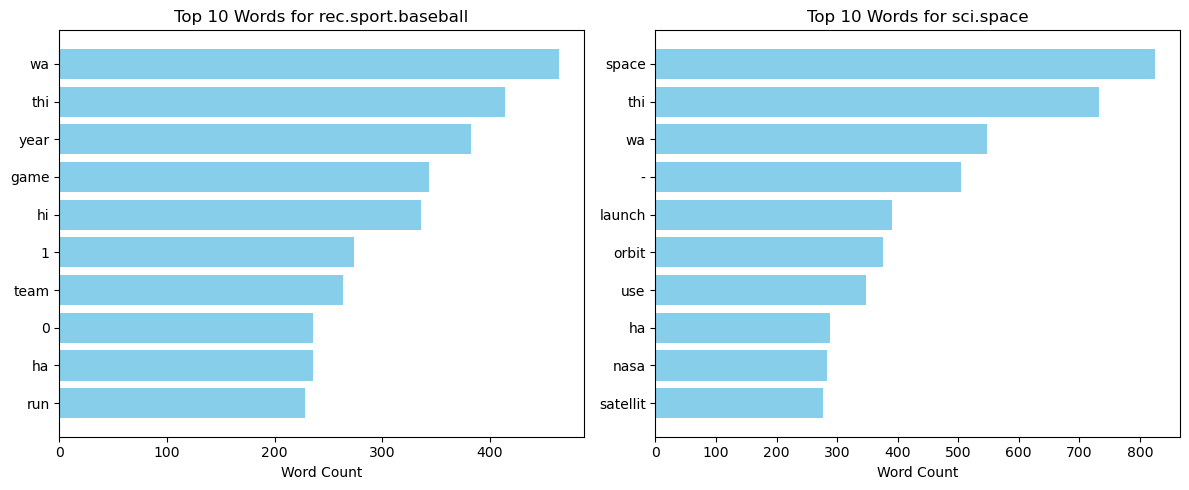

In [39]:

# 6️⃣ Visualize Top Words in Each Category (Using Raw Counts)
def plot_top_words(model, vectorizer, categories, n=10):
    """
    Visualizes the top N most important words for each category based on raw word counts.
    
    How It Works:
    - The model stores word counts for each class.
    - We extract the most commonly used words in each category.
    - We visualize the words that best differentiate "sci.space" from "rec.sport.baseball".
    
    Parameters:
    - model: Trained Naive Bayes model (MultinomialNB)
    - vectorizer: CountVectorizer instance used to convert text into Bag-of-Words
    - categories: List of class names corresponding to the model's output
    - n: Number of top words to display per category
    """

    # Get the vocabulary: A list of all words indexed by feature position
    feature_names = vectorizer.get_feature_names_out()
    
    # Get the raw count of each word per class
    word_counts = model.feature_count_  # This gives raw word occurrence counts per class

    # Plot the top N words per class
    plt.figure(figsize=(12, 5))

    for i, class_label in enumerate(model.classes_):
        # Find indices of the top N words for this class based on raw counts
        top_n_indices = np.argsort(word_counts[i])[-n:][::-1]  # Sort descending

        # Get the actual words and their raw counts
        top_words = [feature_names[j] for j in top_n_indices]
        top_counts = [word_counts[i][j] for j in top_n_indices]

        # Plot for the current class
        plt.subplot(1, 2, i + 1)
        plt.barh(top_words, top_counts, color='skyblue')
        plt.xlabel("Word Count")
        plt.title(f"Top {n} Words for {categories[i]}")
        plt.gca().invert_yaxis()  # Ensure highest count words appear at the top

    plt.tight_layout()
    plt.show()

# 🔥 Plot top words
plot_top_words(model, vectorizer, categories, n=10)


Looking at the most frequent tokens for each category, we can see that the tokens are quite different. We still observe a few stopwords, such as "wa" "ha", "1", "thi", "0". These could be removed to improve the model's performance. This is left as an exercise for the reader.

## 3. Advancing to TF-IDF

One limitation of the bag-of-words model is that it treats all words as equally important. However, some words are more important than others in a document. For example, the word "space" is likely more important in a document about space than the word "baseball.". How might we account for this in our model?

One way to address this issue is to use **Term Frequency-Inverse Document Frequency (TF-IDF)**. TF-IDF is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents. It is calculated as the product of two terms:

1. **Term Frequency (TF)**: The frequency of a word in a document. This is our CountVectorizer. It is calculated as the number of times a word appears in a document divided by the total number of words in the document.
2. **Inverse Document Frequency (IDF)**: The inverse of the frequency of a word in a collection of documents. It is calculated as the logarithm of the total number of documents divided by the number of documents containing the word.

Tokens that appear frequently in a document but infrequently in other documents are considered important and receive a high TF-IDF score. Conversely, tokens that appear frequently in all documents are considered less important and receive a low TF-IDF score.

Let's implement TF-IDF on our dataset. We will use the `TfidfVectorizer` from scikit-learn, which combines the CountVectorizer and TfidfTransformer into a single step. We will follow the same steps as before, but this time we will use the `TfidfVectorizer` instead of the `CountVectorizer`.

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer


# 2️⃣ Convert text into Bag-of-Words representation
vectorizer = TfidfVectorizer(
    tokenizer=preprocess_text,  # <--- Use our custom preprocess_text function as the tokenizer
    # min_df=0.01,  # Ignore terms that have a document frequency strictly lower than the given threshold
    # max_df=0.9,  # Ignore terms that have a document frequency strictly higher than the given threshold
)


X_train = vectorizer.fit_transform(newsgroups_train.data)  # Learn the vocabulary and transform the data into feature vectors
X_test = vectorizer.transform(newsgroups_test.data) # Transform the test data into feature vectors (Never fit your test data!)

# Target labels (1=space 0=baseball)
y_train = newsgroups_train.target
y_test = newsgroups_test.target

# Create a DataFrame from the vectorizer vocabulary
vocab = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out(), index=newsgroups_train.data)
vocab.head()

/opt/anaconda3/envs/aiml25-ma2/lib/python3.13/site-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,#,#/usr/bin/perl,#0739,#1,#102,#14,#150,#1506,#2,#2219,...,~31,~400,~5,~50,~85,~ftp/pub/rsdwg,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~,º,ñ-
"I've been saying this for quite some time, but being absent from the\nnet for a while I figured I'd stick my neck out a bit...\n\nThe Royals will set the record for fewest runs scored by an AL\nteam since the inception of the DH rule. (p.s. any ideas what this is?)\n\nThey will fall easily short of 600 runs, that's for damn sure. I can't\nbelieve these media fools picking them to win the division (like our\nTom Gage of the Detroit News claiming Herk Robinson is some kind of\ngenius for the trades/aquisitions he's made)\n\nc-ya\n\nSean\n\n",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Sorry for asking a question that's not entirely based on the\ntechnical aspects of space, but I couldn't find the\nanswer on the FAQs !\n\nI'm currently in the UK, which makes seeing a Space Shuttle\nlaunch a little difficult.....\n\nHowever, I have been selected to be an exchange student\nat Louisiana State Uni. from August, and I am absolutely\ndetermined to get to see a Space Shuttle launch sometime\nduring the year at which I will be in America.\n\nI hear there's a bit of a long mailing list, so if someone\ncan tell me how to get tickets and where to get them from, then\nplease E-mail me !\n\nThanks very much for your patience....\n\n(And if anyone else wants to know, tell me and I'll summarize\nfor you - just to save all those poor people who have to\npay for their links !)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"Giant's have a five man rotation of John Burkett, Trevor Wilson,\nBill Swift, Jeff Brantley, and Bud Black/Dave Burba. Black has\nbeen put on the 15 day disables and Dave Burba will take his starts.\n\n",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"\n\nLot's of these small miners are no longer miners. THey are people living\nrent free on Federal land, under the claim of being a miner. The facts are\nmany of these people do not sustaint heir income from mining, do not\noften even live their full time, and do fotentimes do a fair bit\nof environmental damage.\n\nThese minign statutes were created inthe 1830's-1870's when the west was\nuninhabited and were designed to bring people into the frontier. Times change\npeople change. DEAL. you don't have a constitutional right to live off\nthe same industry forever. Anyone who claims the have a right to their\njob in particular, is spouting nonsense. THis has been a long term\nfederal welfare program, that has outlived it's usefulness.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"The term ""stopper"" is generally used to refer to a pitcher, one\nwho can be counted on to pitch a strong game to keep his team from going\non a losing streak.\n\n\tThe Braves have plenty of pitchers to fit this description,\nalthough right now I'd expect Smoltz or Glavine to take the mantle.\n\n\tWhat the Braves lack, however, is an offensive stopper,\nsomebody they can look to to bring them out of their hitting slump.\nThere's just no one there. The Braves got rid of their best pure\nhitter, Lonnie Smith, and only Terry Pendleton on the current roster\nhas ever shown more than a cursory ability to hit.\t\n\n\tOh, and another thing that worries me. Ron Gant seems to have\nslowed down a step. That's scary. A slow Ron Gant doesn't have much going\nfor him.",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Notice how the TF-IDF scores are floating-point numbers, unlike the integer counts in the CountVectorizer. This is because the TF-IDF score is a statistical measure that evaluates the importance of a word in a document relative to a collection of documents.

In [49]:
# 3️⃣ Train a Naive Bayes classifier (good for BoW text data)
model = MultinomialNB()
model.fit(X_train, y_train)

# 4️⃣ Predict on the test set
y_pred = model.predict(X_test)

In [50]:
# Compute accuracy by comparing predicted labels (y_pred) with actual labels (y_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Generate a detailed classification report (precision, recall, f1-score)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=categories))


Model Accuracy: 0.9406

Classification Report:

                    precision    recall  f1-score   support

rec.sport.baseball       0.93      0.95      0.94       397
         sci.space       0.95      0.93      0.94       394

          accuracy                           0.94       791
         macro avg       0.94      0.94      0.94       791
      weighted avg       0.94      0.94      0.94       791



This notebook drills down into a pretty old mechanism to represent text as numbers called TF-IDF a.k.a Term Frequency Inverse Document Frequency.

So, what is TF-IDF? 

Intuitively, to understand what text is about, we look for words that occur frequently. Term frequency covers that aspect by capturing the number of times each word occurs in the text. To downgrade the relative importance of words that occur all too frequently, an inverse weighting is introduced to scale down the words that occur too frequently. This inverse weighting is referred to as Inverse Document Frequency. Together, TF-IDF captures the relative importance of words in a set of documents or a collection of texts.

There are many great articles written on the intuition behind TF-IDF and not many written on how to derive the exact values for TF-IDF. The focus of this notebook is to piece together various calculations involved and provide how to derive each step programmatically so that you can derive it on the texts you are working with. We will look at the maths involved in an intuitive way as we go along. 

We will be using a beautiful poem by mystic poet Rumi as our example corpus. First, we will calculate TF IDF values for the poem using TF IDF Vectoriser from the sklearn package. Then, we will pull apart the various components and work through various steps involved in calculating TF-IDF values. Mathematical calculations and Python code will be provided for each step.

Understanding TF-IDF calculations from scratch will help you with developing better intuitions on the results you obtain from applying any algorithm on TF-IDF values.

## Introducing Corpus<a name="corpus"></a>

To illustrate the concept of TF-IDF, we need a corpus. A corpus is a collection of documents. In a typical Natural Language Processing problem, a corpus can vary from a list of call center logs/ transcripts, a list of social media feedback to a large collection of research documents.

To illustrate the various steps involved, we need to keep the corpus as small as possible. I chanced upon this quote / beautiful poem from the 13th century Persian Poet and Sufi Mystic Rumi (Jalāl ad-Dīn Muhammad Rūmī) and it fits our use case perfectly. So, we will be using this poem as our list of documents with each sentence considered as a document.

![Rumi poem](RumiQuote.png)

In [3]:
corpus =  ["you were born with potential",
"you were born with goodness and trust",
"you were born with ideals and dreams",
"you were born with greatness",
"you were born with wings",
"you are not meant for crawling, so don't",
"you have wings",
"learn to use them and fly"
]

# Looking ahead to the final output<a name="output"></a>
We will be decimating the beautiful poem into mysterious decimals in this step. But, hey, after all, we are trying to demystify these decimals by understanding the  calculations involved in TF-IDF. As mentioned before, it is quite easy to derive through sklearn package.

In [ ]:
#transform the tf idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
X_train_tf_idf = tf_idf_vect.fit_transform(corpus)
terms = tf_idf_vect.get_feature_names()


### Helper Functions
As the outputs are sparse matrices, for the ease of visualisation it is converted to dataframe. As the matrix is very small(8 rows * 25 columns), memory is not a constraint here.

In [74]:
# create a dataframe from a word matrix
def dtm2df(wm, feat_names):
    
    # create an index for each row
    doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm.toarray(), index=doc_names,
                      columns=feat_names)
    return(df)

def idf2df(wm, feat_names):
  
    # create an index for each row
    # doc_names = ['Doc{:d}'.format(idx) for idx, _ in enumerate(wm)]
    df = pd.DataFrame(data=wm, index=[0],
                      columns=feat_names)
    return(df)

In [ ]:
df_tf_idf = dtm2df(X_train_tf_idf ,terms)
display(HTML(df_tf_idf.to_html()))  # noqa

In the matrix above, each row represents a sentence from the above poem. Each column represents a unique word in the corpus above in alphabetical order. As you can see, there are lot of zeros in the matrix. So, a memory efficient sparse matrix is used for representing this. I have converted it to a data frame for ease of visualization.

Let us interpret the numbers we have received so far. As you may have noticed, the words "you were born" are repeated throughout the corpus. So, we anticipate that these words will not be getting high TF-IDF scores. Manually if you look at the values for those three words, you can see that most often they get .2 and .3.

Let us look at Document 0- You were born with potential. The word potential stands out. If you look at the various TF-IDF values in the first row in the matrix, you will see that the word potential has the highest TF-IDF value.
Let us look at Document 4 (row 5): You were born with wings. Again, same as before, the word "wings" has the highest value in that sentence. 

Notice that the word "wings" appears also in Document 6. TF-IDF value for the word wings in Document 6 is different to TF-IDF value for the word wings in Document 4. In Document 6, the word "wings" is deemed less important than the word "have" in Document 6 as the word "have" appears only once in the entire corpus.

The objective of this article is to look at how the above TF-IDF values can be calculated from scratch. We will be focusing on applying the calculations on the words wings and potential in particular, to derive the values highlighted in red in the matrix displayed above.

We will break apart the various components and then put them back together. We will do this in three steps:
* Step 1: Derive term frequency values 
* Step 2: Derive inverse document frequency values 
* Step 3: Aggregate the above two values using multiplication and normalization

---

# Step 1: Calculate Term Frequency<a name="tf"></a>

The term frequency is pretty straight forward. It is calculated as the number of times the words/terms appear in a document.

Let us consider the following 2 documents

* Document 0 - "You were born with potential" - each of the words appear once in this document
* Document 4 - "You were born with wings" - again, each of the words appear once in this document



![Count Vectorizer Example](.\images\count_vect_small.png "count vectorizer example")

Let us now use CountVectorizer to count the words and display the word count matrix. The matrix obtained below is also known as "Bag Of Words" or "Document Term Matrix".

In [ ]:
# Find the number of times each time a word appears in a document (a sentence in the case of our corpus)
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(corpus)
terms = count_vect.get_feature_names()

df_count = dtm2df(X_train_counts ,terms)
display(HTML(df_count.to_html()))  # noqa


![Count Vectorizer All](.\images\count_vect_all.png "count vectorizer")

Based on above: 
* Term Frequency of potential in Doc0 = 1
* Term Frequency of wings in Doc5 = 1
* Term Frequency of wings in Doc 7 = 1

---

# Step 2. Calculating Inverse Document Frequency<a name="idf"></a>

Given the relative importance of frequently used words, we need a mechanism to tone down the importance of such words. Enter Inverse Document Frequency. Intuitively, if a word appears in all documents, then it may not play such a big part in differentiating between the documents. 

<i> Similar to Term Frequency </i>
* <i>Document Frequency(term t) = number of documents with the term t/ total number of documents = d(t)/n</i>
* <i>Inverse Document Frequency = total number of documents / number of documents with the term t = n / d(t)</i>

Logarithmic scale intuitively makes sense to be used here as log(1) is 0. However, there are some practical considerations such as avoiding the division by 0 error, 1 is added to the denominator.
Inverse Document frequency for the default settings in TF IDF vectorizer in sklearn is calculated as below (default settings have smooth_idf=True which adds 1 to numerator and denominator).
n is the total number of documents in the document set.
d(t) is the number of documents in the document set that contain term .

$$ idf(t) = \ln (\frac{1+n}{1+df(t)})+1 $$
* $n$  is the total number of documents in the document set, and 
* $d(t)$ is the number of documents in the document set that contain term . 

Applying the above formula for calidf value for the word potential
* Number of Documents = 8
* Number of documents in the corpus that contain the word 'potential' = 1

$$ idf(potential) = \ln (\frac{1+8}{1+1})+1
                  = \ln (\frac {9}{2})+1
                  = 2.504077 $$

Applying the above formula for calidf value for the word potential
* Number of Documents = 8
* Number of documents in the corpus that contain the word 'wings' = 2

$$ idf(wings) = \ln (\frac{1+8}{2+1})+1
                  = \ln (\frac {9}{3})+1
                  = 2.098612 $$

In [ ]:
# explore idf
# idf_ attribute can be used to extract IDF values
# transpose the 1D IDF array to convert to a dataframe to make it easy to visualise
df_idf = idf2df(vectorizer.idf_[:,np.newaxis].T ,terms)
display(HTML(df_idf.to_html()))    # noqa

We obtain the values as shown below and we can cross-check the values from our calculations.

---

# Step 3: Aggregate TF and IDF<a name="aggregate_tf_idf"></a>

As the name implies TF-IDF is a combination of Term Frequency(TF) and Inverse Document Frequency(IDF), obtained by multiplying the 2 values together. The sklearn implementation then applies normalization on the product between TF and IDF. Let us look at each of those steps in detail.

### Step 3A:  Multiply TF and IDF<a name="multiply_tf_idf"></a>

In multiplying the 2 matrices together, we take an element-wise multiplication of Term Frequency Matrix and Inverse Document Frequency. Consider the first sentence - "You were born with potential". To find the product of TF and IDF for this sentence, it is calculated as below.![TF.IDF Example](.\images\tf.idf_example.png "TF.IDF example")


In [ ]:
#elment wise dot product
df_mul = df_count.mul(df_idf.to_numpy())
display(HTML(df_mul.to_html()))    # noqa

You may notice that the product of TF and IDF can be above 1. 
Now, the last step is to normalize these values so that TF-IDF values always scale between 0 and 1.

### Step 3 B: Normalize TF-IDF product<a name="normalize_tf_idf"></a>

In day to day life, when we want to normalize the values so that we can compare them easily we use percentages or proportions. We can potentially calculate a proportion of TF-IDF values across various words in a sentence. 

Note that both TF and IDF are non-negative values as the lowest value possible for Term Frequency and Inverse Document Frequency is 0. So, taking out proportions would be equivalent to what is known as L1 normalization. In L1 normalization each value in a vector(think various TF-IDF values of a sentence) is divided by sum of absolute values all elements. 

There is an option to L1 normalize the values in sklearn, but that is not the default setting.
Default normalization applied is L2 normalization.Easiest way to think about L2 normalization is to think about the length of a line or Pythogoras theorem.
![L2 Normalization](.\images\eg_L2_normalisation.png "L2 Normalization example")

In the diagram above, the length of the line is 5. In this case, the line is a 1D vector. When vectors are n-dimensional, the length of the vector is similar to length of a line but extended to n dimensions. So, if a vector v is composed of n-elements, the length of the vector is calculated as
![Length Vector](.\images\length_vector.png "Length of a Vector")

In L2 normalization, we are essentially dividing the vector by the length of the vector . For a more mathematical explanation of L1 and L2 norm, please refer to Wikipedia.
To apply L2 norm, for each of the sentences we need to calculate the square root of sum of squares of the product of TF and IDF.
It can be done in Python as below


Here are the values obtained
![Euclidean Distance](.\images\euclidean_distance_tfidf.png "Euclidean Distance")


Finally, we are ready to calculate the final scores
* <i>TF-IDF for the word potential in "you were born with potential" (Doc 0): 2.504077 / 3. 66856427 = 0.682895</i>
* <i>TF-IDF for the word wings in you were born with wings Doc4 = 2.098612/ 3. 402882126 = 0.616716</i>
* <i>TF-IDF for the word wings in Doc6 = 2.098612/ 3. 452116387 = 0.607744</i>

This can be programatically achieved by the following code.

In [ ]:
from sklearn.preprocessing import Normalizer
df_mul.iloc[:,:] = Normalizer(norm='l2').fit_transform(df_mul)
display(HTML(df_mul.to_html()))  # noqa

When you run the above code, you get the results as below, which is same as the matrix in final output session
So, far we have done the following
![Calculation Overview](.\images\calculation_overview.png "Calculation Overview")


---

# Why TF IDF is still relevant? <a name="relevance"></a>
In the field of Natural Language Processing, word embedding in 2013 and language models in 2018 have changed the landscape and led to many state of the art models for problems in NLP. So, it seems a bit strange that here in 2020, I have chosen to talk about TF IDF which was first formulated in 1970. Here are my 2 reasons why I think it is good to understand the underlying calculations.
1. Understanding TF-IDF makes it one step easier to understand the results of algorithms you apply on top of TF-IDF. 
2. In 2018, Google released a text classification framework based on 450K experiments on a few different text sets. In text classification problems, the algorithms have to predict the topic based on a predefined set of topics it has trained on. Text classification problem is a common problem to solve for many companies. Based on the 450K experiments, Google found that when the number of samples/number of words < 1500, TF IDF was the best way to represent text. 

# Limitations <a name="limitations"></a>
The main limitation of TF IDF is that word order which is an important part of understanding the meaning of a sentence is not considered in TF-IDF.
Another limitation is that document length can introduce a lot of variance in the TF IDF values. ??



# Assumptions and Conventions <a name="assumptions"></a>
Following are the assumptions and conventions used in this article.
1. Rounding - For the ease of visualization, decimals are rounded to 4 decimal places. I have taken care not to round the numbers that are called out as examples. Any rounding changes you may spot in various cells are because of that. 
2. As mentioned in the sklearn documentation, there is a slight difference between most text-book formula for IDF and the implementation in sklearn.
3. For simplicity, I have used default settings for sklearn TF IDF vectorizer. There are ways to alter this such as 

    * a) Use L1 normalization instead of L2 normalization
    * b) Omit using smooth_idf in which case 1 that is added to numerator and denominator will be omitted. <divide by zero error> 
    


# References: <a name="references"></a>
* [1] <a href = "https://scikit-learn.org/stable/modules/feature_extraction.html">scikit-learn documentation</a> 
* [2]<a href="https://developers.google.com/machine-learning/guides/text-classification/step-2-5">Text Classification Framework</a>, Google, 2018 
* [3]Link to the medium post for helper function


# Additional Notes <a name="notes"></a>

TF IDF can also be calculated by transforming the CountVectorizer as shown below

In [ ]:

#transform the count vectorizer
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer().fit(X_train_counts)
X_train_tf_idf = tf_transformer.transform(X_train_counts)
X_train_tf_idf.shape
print(dtm2df(X_train_tf_idf ,terms))    
